# **Previous Notebooks**

https://www.kaggle.com/vexxingbanana/sartorius-coco-dataset-notebook

https://www.kaggle.com/vexxingbanana/sartorius-mmdetection-training

# **References**

https://www.kaggle.com/dschettler8845/sartorius-segmentation-eda-and-baseline

https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding

https://www.kaggle.com/stainsby/fast-tested-rle

https://www.kaggle.com/paulorzp/run-length-encode-and-decode

https://www.kaggle.com/awsaf49/sartorius-mmdetection-infer

https://www.kaggle.com/awsaf49/sartorius-mmdetection-train

https://www.kaggle.com/evancofsky/sartorius-torch-lightning-mask-r-cnn/notebook

# **Install MMDetection**

In [1]:
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl' --no-deps

Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1


In [2]:
!pip install '/kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmpycocotools-12.0.3/mmpycocotools-12.0.3' --no-deps

!rm -rf mmdetection

!cp -r ../input/edited-mmdetection /kaggle/working/
!mv /kaggle/working/edited-mmdetection /kaggle/working/mmdetection
%cd /kaggle/working/mmdetection
!pip install -e .

Processing /kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl
Processing /kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272232 s

In [3]:
!pip install -q '/kaggle/input/global-wheels/orjson-3.6.5-cp37-cp37m-manylinux_2_24_x86_64.whl'

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.32.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.32.0 requires pyarrow<5.0.0,>=0.15.1, but you have pyarrow 5.0.0 which is incompatible.
apache-beam 2.32.0 requires typing-extensions<3.8.0,>=3.7.0, but you have typing-extensions 3.10.0.2 which is incompatible.


# **Import Libraries**

In [4]:
# asdkansknd uyiyv vbibvi ibiubikubiiku

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import sklearn
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cupy as cp
import gc
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
import json
from PIL import Image, ImageEnhance
import albumentations as A
import mmdet
import mmcv
from albumentations.pytorch import ToTensorV2
import seaborn as sns
import glob
from pathlib import Path
import pycocotools
from pycocotools import mask
import numpy.random
import random
import cv2
import re
import shutil
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot, set_random_seed

import skimage.segmentation
import skimage

import orjson
from tqdm import tqdm
import sys
numpy.set_printoptions(threshold=sys.maxsize)

In [6]:
%cd ..

/kaggle/working


# **Helper Functions**

In [7]:
IMG_WIDTH = 704
IMG_HEIGHT = 520

In [8]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [9]:
def rle_encoding(x):
    dots = np.where(x.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join(map(str, run_lengths))

In [10]:
def get_mask_from_result(result):
    d = {True : 1, False : 0}
    u,inv = np.unique(result,return_inverse = True)
    mk = cp.array([d[x] for x in u])[inv].reshape(result.shape)
#     print(mk.shape)
    return mk

In [11]:
def does_overlap(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            return True
    return False


def remove_overlapping_pixels(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            print("Overlap detected")
            mask[np.logical_and(mask, other_mask)] = 0
    return mask

In [12]:
def get_img_and_mask(img_path, annotation, width, height):
    """ Capture the relevant image array as well as the image mask """
    img_mask = np.zeros((height, width), dtype=np.uint8)
    for i, annot in enumerate(annotation): 
        img_mask = np.where(rle_decode(annot, (height, width))!=0, i, img_mask)
    img = cv2.imread(img_path)[..., ::-1]
    return img[..., 0], img_mask

def plot_img_and_mask(img, mask, invert_img=True, boost_contrast=True):
    """ Function to take an image and the corresponding mask and plot
    
    Args:
        img (np.arr): 1 channel np arr representing the image of cellular structures
        mask (np.arr): 1 channel np arr representing the instance masks (incrementing by one)
        invert_img (bool, optional): Whether or not to invert the base image
        boost_contrast (bool, optional): Whether or not to boost contrast of the base image
        
    Returns:
        None; Plots the two arrays and overlays them to create a merged image
    """
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,3,1)
    _img = np.tile(np.expand_dims(img, axis=-1), 3)
    
    # Flip black-->white ... white-->black
    if invert_img:
        _img = _img.max()-_img
        
    if boost_contrast:
        _img = np.asarray(ImageEnhance.Contrast(Image.fromarray(_img)).enhance(16))
        
    plt.imshow(_img)
    plt.axis(False)
    plt.title("Cell Image", fontweight="bold")
    
    plt.subplot(1,3,2)
    _mask = np.zeros_like(_img)
    _mask[..., 0] = mask
    plt.imshow(mask, cmap='rainbow')
    plt.axis(False)
    plt.title("Instance Segmentation Mask", fontweight="bold")
    
    merged = cv2.addWeighted(_img, 0.75, np.clip(_mask, 0, 1)*255, 0.25, 0.0,)
    plt.subplot(1,3,3)
    plt.imshow(merged)
    plt.axis(False)
    plt.title("Cell Image w/ Instance Segmentation Mask Overlay", fontweight="bold")
    
    plt.tight_layout()
    plt.show()

# **Cascade MRCNN Model**

In [13]:
# from mmcv import Config
# cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco.py')
# # cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco.py')

In [14]:
# for head in cfg.model.roi_head.bbox_head:
#     head.num_classes = 3
    
# cfg.model.roi_head.mask_head.num_classes=3

# cfg.test_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(
#         type='MultiScaleFlipAug',
#         img_scale=(1333, 800),
#         flip=False,
#         transforms=[
#             dict(type='Resize', keep_ratio=True),
#             dict(type='RandomFlip'),
#             dict(
#                 type='Normalize',
#                 mean=[128, 128, 128],
#                 std=[11.58, 11.58, 11.58],
#                 to_rgb=True),
#             dict(type='Pad', size_divisor=32),
#             dict(type='ImageToTensor', keys=['img']),
#             dict(type='Collect', keys=['img'])
#         ])
# ]

# # cfg.data.test.pipeline[1].transforms[2] = dict(
# #                                             type='Normalize',
# #                                             mean=[128, 128, 128],
# #                                             std=[11.58, 11.58, 11.58],
# #                                             to_rgb=True)

# cfg.data.test.pipeline = cfg.test_pipeline

# cfg.model.test_cfg.rcnn.max_per_img = 300

# # cfg.load_from = '../input/cascade-mask-rcnn-mmdet/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco_20200512_161033-bdb5126a.pth'

# cfg.work_dir = '/kaggle/working/model_output'

# cfg.data.samples_per_gpu = 2
# cfg.data.workers_per_gpu = 2

# cfg.img_norm_cfg = dict(  
#     mean=[128, 128, 128],  
#     std=[11.58, 11.58, 11.58],  
#     to_rgb=True)

# cfg.seed = 0
# set_random_seed(0, deterministic=False)
# cfg.gpu_ids = range(1)
# cfg.fp16 = dict(loss_scale=512.0)
# meta = dict()
# meta['config'] = cfg.pretty_text

# print(f'Config:\n{cfg.pretty_text}')

# **MS RCNN Model**

In [15]:
from mmcv import Config
cfg = Config.fromfile('/kaggle/working/mmdetection/configs/ms_rcnn/ms_rcnn_x101_32x4d_fpn_1x_coco.py')
# cfg = Config.fromfile('/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco.py')

In [16]:
cfg.model.roi_head.bbox_head.num_classes = 3
    
cfg.model.roi_head.mask_head.num_classes=3

cfg.model.roi_head.mask_iou_head.num_classes=3

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[128, 128, 128],
                std=[11.58, 11.58, 11.58],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ])
]

# cfg.data.test.pipeline[1].transforms[2] = dict(
#                                             type='Normalize',
#                                             mean=[128, 128, 128],
#                                             std=[11.58, 11.58, 11.58],
#                                             to_rgb=True)

cfg.data.test.pipeline = cfg.test_pipeline

cfg.model.test_cfg.rcnn.max_per_img = 300

# cfg.load_from = '../input/cascade-mask-rcnn-mmdet/cascade_mask_rcnn_x101_64x4d_fpn_20e_coco_20200512_161033-bdb5126a.pth'

cfg.work_dir = '/kaggle/working/model_output'

cfg.data.samples_per_gpu = 2
cfg.data.workers_per_gpu = 2

cfg.img_norm_cfg = dict(  
    mean=[128, 128, 128],  
    std=[11.58, 11.58, 11.58],  
    to_rgb=True)

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.fp16 = dict(loss_scale=512.0)
meta = dict()
meta['config'] = cfg.pretty_text

print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='MaskScoringRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_32x4d'),
        groups=32,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls

# **Inference**

In [17]:
confidence_thresholds = {0: 0.25, 1: 0.55, 2: 0.35}

In [18]:
segms_pr = []
files = []

# TODOs:[by 7 pm]

> -[x] extract the images

> -[ ] use the validation code and run that

> -[ ] see if the LB and validation is matching or not

>> ### Questionaries:
>> - skimage.segmentation.relabel_sequential ?
>> - np.pad() ?

# Next TODOs:
-[ ] Set up TTA,NMS, NMW

In [19]:
!ls -GFlash --color /kaggle/input/sartorius-coco-train-and-val-annotations

total 16M
   0 drwxr-xr-x  2 nobody    0 Dec 22 13:22 ./
4.0K drwxr-xr-x 11 root   4.0K Dec 24 08:14 ../
 15M -rw-r--r--  1 nobody  15M Dec 22 13:22 train_dataset.json
664K -rw-r--r--  1 nobody 661K Dec 22 13:22 val_dataset.json


In [20]:
# import json
# with open("/kaggle/input/sartorius-coco-train-and-val-annotations/val_dataset.json") as val_file:
#     val_data = json.load(val_file)
#     val_pretty = json.dumps(val_data,indent=2, separators=(',',':'),sort_keys = True)

# print(len(val_data["images"]))
# print(val_data["images"][0]["file_name"])

In [21]:
# with open("/kaggle/input/sartorius-coco-train-and-val-annotations/val_dataset.json") as f:
#     val_data = orjson.loads(f.read())

# all_val_img = []
# for file_block in range(len(val_data["images"])):
#     all_val_img.append(val_data["images"][file_block]["file_name"].replace("..","/kaggle"))


In [22]:
# df = pd.read_csv("/kaggle/input/sartorius-cell-instance-segmentation/train.csv")
# df.head()

In [23]:
# def rle_decode(mask_rle, shape, color=1):
#     '''
#     mask_rle: run-length as string formated (start length)
#     shape: (height,width) of array to return 
#     Returns numpy array, 1 - mask, 0 - background
#     '''
#     s = mask_rle.split()
#     starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
#     starts -= 1
#     ends = starts + lengths
#     img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
#     for lo, hi in zip(starts, ends):
#         img[lo : hi] = color
#     return img.reshape(shape)
    



# def build_masks(image_id,input_shape, colors=True):
#     height, width = input_shape
#     labels = df[df["id"] == image_id]["annotation"].tolist()
#     if colors:
#         mask = np.zeros((height, width, 3))
#         for label in labels:
#             mask += rle_decode(label, shape=(height,width , 3), color=np.random.rand(3))
#     else:
#         mask = np.zeros((height, width, 1))
#         for label in labels:
#             mask += rle_decode(label, shape=(height, width, 1))
#     mask = mask.clip(0, 1)
#     return mask

In [24]:
# # sample_masks=build_masks(ide,input_shape=(520, 704), colors=False)

# all_val_mask = []
# for val_img in tqdm(all_val_img):
#     ide = val_img.split("/")[-1].split(".")[0]
#     sample_masks=build_masks(ide,input_shape=(520, 704), colors=False)
#     all_val_mask.append(sample_masks)

In [25]:
# plt.imshow(all_val_mask[23])
# plt.axis(False)
# plt.show()

In [26]:
# iou_map(all_val_mask[23],all_val_mask[23],verbose=1)

In [27]:
# np.unique(all_val_mask[23])

In [28]:
# def rles_to_mask(encs, shape):
#     """
#     Decodes a rle.

#     Args:
#         encs (list of str): Rles for each class.
#         shape (tuple [2]): Mask size.

#     Returns:
#         np array [shape]: Mask.
#     """
#     img = np.zeros(shape[0] * shape[1], dtype=np.uint)
#     for m, enc in enumerate(encs):
#         if isinstance(enc, np.float) and np.isnan(enc):
#             continue
# #         print(enc)
#         enc_split = enc.split()
#         for i in range(len(enc_split) // 2):
#             start = int(enc_split[2 * i]) - 1
#             length = int(enc_split[2 * i + 1])
#             img[start: start + length] = 1 + m
#     return img.reshape(shape)

In [29]:
# df1 = pd.read_csv('/kaggle/input/sartorius-cell-instance-segmentation/train.csv')
# df = df1.groupby('id').agg(list).reset_index()

# for col in df.columns[2:]:
#     df[col] = df[col].apply(
#         lambda x: np.unique(x)[0] if len(np.unique(x)) == 1 else np.unique(x)
#     )
    
    
# i = 0  # feel free to change that

# shape = df[['height', 'width']].values[i]

# rles = df['annotation'][i]

# masks = rles_to_mask(rles, shape).astype(np.uint16)



# # # plt.figure(figsize=(15, 10))
# # # plt.imshow(masks)
# # # plt.axis(False)
# # # plt.show()
# # # print(np.unique(masks))
# # masks


# # df
# # df.columns[2:]

In [30]:
# rles

In [31]:
# # offset pixels
# offset = 1
# y_pred = masks[offset:, offset:]
# y_pred = np.pad(y_pred, ((0, offset), (0, offset)), mode="constant")

# # Remove a bunch of cells
# y_pred[y_pred > 300] = 0 

# # Relabel objects
# y_pred, _, _ = skimage.segmentation.relabel_sequential(y_pred) 


# plt.figure(figsize=(15, 10))
# plt.imshow(y_pred)
# plt.axis(False)
# plt.show()

In [32]:
# def compute_iou(labels, y_pred):
#     """
#     Computes the IoU for instance labels and predictions.

#     Args:
#         labels (np array): Labels.
#         y_pred (np array): predictions

#     Returns:
#         np array: IoU matrix, of size true_objects x pred_objects.
#     """

#     true_objects = len(np.unique(labels))
#     pred_objects = len(np.unique(y_pred))

#     # Compute intersection between all objects
#     intersection = np.histogram2d(
#         labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects)
#     )[0]

#     # Compute areas (needed for finding the union between all objects)
#     area_true = np.histogram(labels, bins=true_objects)[0]
#     area_pred = np.histogram(y_pred, bins=pred_objects)[0]
#     area_true = np.expand_dims(area_true, -1)
#     area_pred = np.expand_dims(area_pred, 0)

#     # Compute union
#     union = area_true + area_pred - intersection
#     iou = intersection / union
    
#     return iou[1:, 1:]  # exclude background

In [33]:
# def precision_at(threshold, iou):
#     """
#     Computes the precision at a given threshold.

#     Args:
#         threshold (float): Threshold.
#         iou (np array [n_truths x n_preds]): IoU matrix.

#     Returns:
#         int: Number of true positives,
#         int: Number of false positives,
#         int: Number of false negatives.
#     """
#     matches = iou > threshold
#     true_positives = np.sum(matches, axis=1) >= 1  # Correct objects
#     false_negatives = np.sum(matches, axis=1) == 0  # Missed objects
#     false_positives = np.sum(matches, axis=0) == 0  # Extra objects
#     tp, fp, fn = (
#         np.sum(true_positives),
#         np.sum(false_positives),
#         np.sum(false_negatives),
#     )
#     return tp, fp, fn

In [34]:
# def iou_map(truths, preds, verbose=0):
#     """
#     Computes the metric for the competition.
#     Masks contain the segmented pixels where each object has one value associated,
#     and 0 is the background.

#     Args:
#         truths (list of masks): Ground truths.
#         preds (list of masks): Predictions.
#         verbose (int, optional): Whether to print infos. Defaults to 0.

#     Returns:
#         float: mAP.
#     """
#     ious = [compute_iou(truth, pred) for truth, pred in zip(truths, preds)]
    
#     print(ious[0].shape)

#     if verbose:
#         print("Thresh\tTP\tFP\tFN\tPrec.")

#     prec = []
#     for t in np.arange(0.5, 1.0, 0.05):
#         tps, fps, fns = 0, 0, 0
#         for iou in ious:
#             tp, fp, fn = precision_at(t, iou)
#             tps += tp
#             fps += fp
#             fns += fn

#         p = tps / (tps + fps + fns)
#         prec.append(p)

#         if verbose:
#             print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tps, fps, fns, p))

#     if verbose:
#         print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))

#     return np.mean(prec)

Use load_from_local loader


/kaggle/working/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


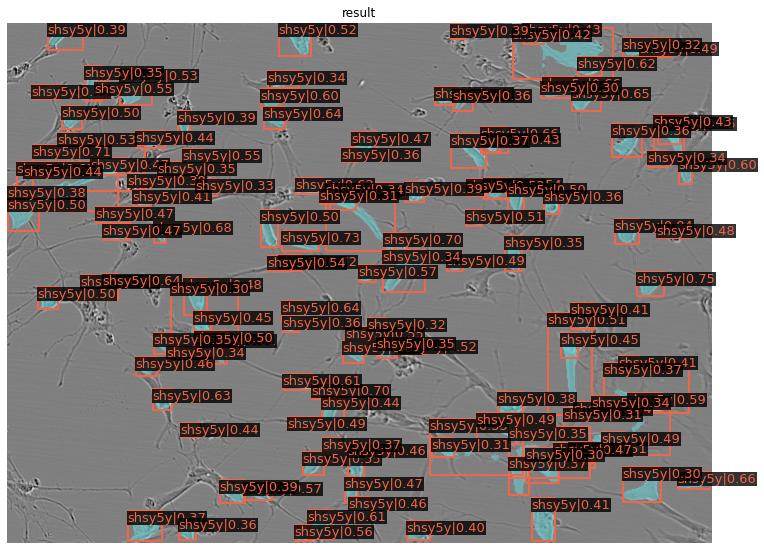

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


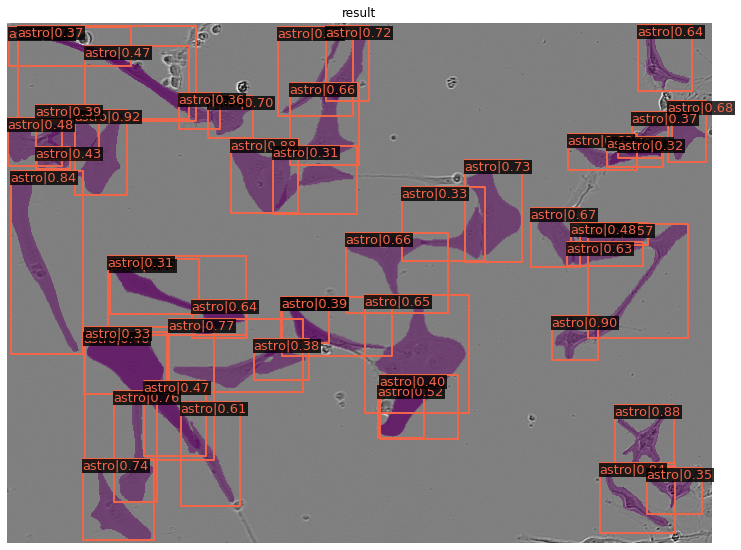

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


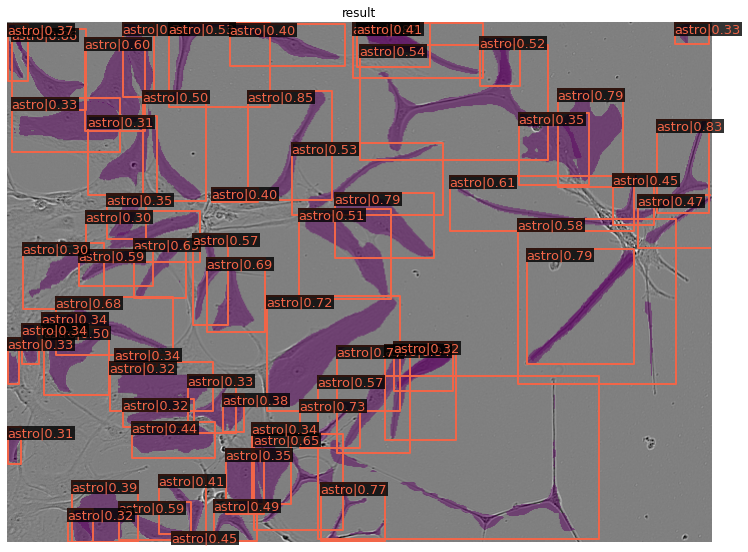

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


In [35]:
import mmcv

model = init_detector(cfg, '/kaggle/input/sartorius-mmdetection-training-1/finetune_output/epoch_5.pth')
for file in sorted(os.listdir('../input/sartorius-cell-instance-segmentation/test')):
    img = mmcv.imread('../input/sartorius-cell-instance-segmentation/test/' + file)
    result = inference_detector(model, img)
    show_result_pyplot(model, img, result)
    bbox_result, segm_result = result
    bboxes = np.vstack(bbox_result)
    
    if isinstance(segm_result, tuple):
        segm_result = segm_result[0]  # ms rcnn
        
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bbox_result)
    ]
    
    labels = np.concatenate(labels)
    
    segms = None
    if segm_result is not None and len(labels) > 0:  # non empty
        segms = mmcv.concat_list(segm_result)
        if isinstance(segms[0], torch.Tensor):
            segms = torch.stack(segms, dim=0).detach().cpu().numpy()
        else:
            segms = np.stack(segms, axis=0)
    
    
    previous_masks = []
    for thres,segs,lable in zip(bboxes[:,-1],segms,labels):
        if thres >= confidence_thresholds[lable]:
            mask = remove_overlapping_pixels(segs, previous_masks)
            previous_masks.append(mask)
    
    for mk in previous_masks:
        rle_mask = rle_encoding(mk)
        segms_pr.append(rle_mask)
        files.append(str(file.split('.')[0]))

In [36]:
# previous_masks[0].dtype

In [37]:
# previous_masks = [i.astype(np.int64) for i in previous_masks]
# h,w = previous_masks[0].shape
# # result = np.full((h,w,3),(0,0,0),dtype = np.int64)
# result = np.zeros((h,w)).astype(np.int64)
# for mask in previous_masks:
#     result = cv2.add(result,mask)
    
    
# # result = result.clip(0,1)
# result = result - 946
# print(result.shape)
# print(np.unique(result))

# # plt.imshow(result)
# plt.imshow(result)

In [38]:
# nums1 = np.random.choice([0, 1, 2], size=(12,19), p=[.7, .1,.2])
# nums2 = np.random.choice([0, 1, 2], size=(12,19), p=[.5, .1,.4])
# # offset pixels
# offset = 1
# y_pred = nums2[offset:, offset:]
# y_pred = np.pad(y_pred, ((0, offset), (0, offset)), mode="constant")

# # Remove a bunch of cells
# # y_pred[y_pred > 300] = 0 

# # Relabel objects
# # y_pred, _, _ = skimage.segmentation.relabel_sequential(y_pred) 
# plt.imshow(y_pred)

In [39]:
# iou_map(nums,y_pred,verbose=1)

In [40]:
# import mmcv


# def model_pred(image_list):
#     model = init_detector(cfg, '/kaggle/input/sartorius-mmdetection-training-1/finetune_output/epoch_6.pth')
#     for file in sorted(image_list):
#         img = mmcv.imread(file)
#         result = inference_detector(model, img)
# #         show_result_pyplot(model, img, result)
        
#         bbox_result, segm_result = result
#         bboxes = np.vstack(bbox_result)

#         if isinstance(segm_result, tuple):
#             segm_result = segm_result[0]  # ms rcnn

#         labels = [
#             np.full(bbox.shape[0], i, dtype=np.int32)
#             for i, bbox in enumerate(bbox_result)
#         ]

#         labels = np.concatenate(labels)

#         segms = None
#         if segm_result is not None and len(labels) > 0:  # non empty
#             segms = mmcv.concat_list(segm_result)
#             if isinstance(segms[0], torch.Tensor):
#                 segms = torch.stack(segms, dim=0).detach().cpu().numpy()
#             else:
#                 segms = np.stack(segms, axis=0)


#         previous_masks = []
#         full_mask_list = []
#         for thres,segs,lable in zip(bboxes[:,-1],segms,labels):
#             if thres >= confidence_thresholds[lable]:
#                 mask = remove_overlapping_pixels(segs, previous_masks)
#                 full_mask +=mask
#                 previous_masks.append(mask)
#         full_mask_list.append(full_mask)

In [41]:
# from tqdm import tqdm

# model = init_detector(cfg, '/kaggle/input/sartorius-mmdetection-training-1/finetune_output/epoch_6.pth')
# # for file in sorted(os.listdir('../input/sartorius-cell-instance-segmentation/test')):
    
#     result = inference_detector(model, img)

# def tta_preds(image_dataset):
# #Now that we know the transformations are working, let us extend to all predictions
#     predictions = []
#     for image in tqdm(image_dataset):
#         pred_original = inference_detector(model, image)
# #         pred_original = model.predict(np.expand_dims(image, axis=0))
        
#         pred_lr = inference_detector(model,np.fliplr(image), axis=0)
#         pred_lr = np.fliplr(pred_lr.squeeze(0))

#         pred_ud = inference_detector(model,np.flipud(image), axis=0)
#         pred_ud = np.flipud(pred_ud.squeeze(0))
        
#         pred_lr_ud = inference_detector(model,np.fliplr(np.flipud(image)), axis=0)
#         pred_lr_ud = np.fliplr(np.flipud(pred_lr_ud).squeeze(0))

#         preds = (pred_original + pred_lr + pred_ud + pred_lr_ud) / 4
#         predictions.append(preds)


#     predictions = np.array(predictions)

#     threshold = 0.5
#     predictions_th = predictions > threshold
    
#     return predictions_th




In [42]:
# dgvadvfasdg

In [43]:
# model = init_detector(cfg, '/kaggle/input/mrcnn-file-weights-mmdetection/epoch_6.pth')
# for file in sorted(os.listdir('/kaggle/input/sartorius-cell-instance-segmentation/test')):
#     img = mmcv.imread('/kaggle/input/sartorius-cell-instance-segmentation/test/' + file)
#     result = inference_detector(model, img)
#     show_result_pyplot(model, img, result)
#     previous_masks = []
#     for i, classe in enumerate(result[0]):
#         if classe.shape != (0, 5):
#             bbs = classe
# #             print(bbs.shape)
# #             break
# #         break
#     break
#             sgs = result[1][i]
#             for bb, sg in zip(bbs,sgs):
#                 box = bb[:4]
#                 cnf = bb[4]
#                 if cnf >= confidence_thresholds[i]:
#                     mask = get_mask_from_result(sg)
#                     plt.imshow(mask.get())
#                     break
#                     mask = remove_overlapping_pixels(mask, previous_masks)
#                     previous_masks.append(mask)

#     for mk in previous_masks:
#             rle_mask = rle_encoding(mk)
#             segms.append(rle_mask)
#             files.append(str(file.split('.')[0]))

In [44]:
# cxdcdcvecesxcsedccxws asndjnas askbdjlas asjndkjabsdas dajbsdjbas

In [45]:
# jsbjxbas sabdkabsd asbdkjabsd asdbaidbfdvfv zxcnzxc

In [46]:
indexes = []
for i, segm in enumerate(segms_pr):
    if segm == '':
        indexes.append(i)

In [47]:
for element in sorted(indexes, reverse = True):
    del segms_pr[element]
    del files[element]

In [48]:
files = pd.Series(files, name='id')
preds = pd.Series(segms_pr, name='predicted')

In [49]:
preds

0      140003 14 140706 20 141410 21 142114 22 142818...
1      177346 12 178048 16 178744 24 179448 25 180151...
2      147413 8 148117 10 148821 12 149525 14 150228 ...
3      178195 3 178898 4 179601 5 180304 6 181008 6 1...
4      164314 1 165015 9 165717 14 166420 17 167123 2...
                             ...                        
226    3056 1 3761 2 4466 2 5172 2 5877 3 6582 5 7291...
227    326754 10 327455 14 328158 15 328861 16 329562...
228    262811 8 263514 14 264217 17 264921 18 265625 ...
229    1409 7 2113 8 2817 8 3522 7 4226 8 4931 7 5636...
230    123325 8 124027 12 124730 14 125432 17 126135 ...
Name: predicted, Length: 231, dtype: object

In [50]:
submission_df = pd.concat([files, preds], axis=1)

In [51]:
submission_df.to_csv('submission.csv', index=False)

In [52]:
submission_df.head()

,id,predicted
0,7ae19de7bc2a,140003 14 140706 20 141410 21 142114 22 142818...
1,7ae19de7bc2a,177346 12 178048 16 178744 24 179448 25 180151...
2,7ae19de7bc2a,147413 8 148117 10 148821 12 149525 14 150228 ...
3,7ae19de7bc2a,178195 3 178898 4 179601 5 180304 6 181008 6 1...
4,7ae19de7bc2a,164314 1 165015 9 165717 14 166420 17 167123 2...


In [53]:
shutil.rmtree('/kaggle/working/mmdetection')